In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

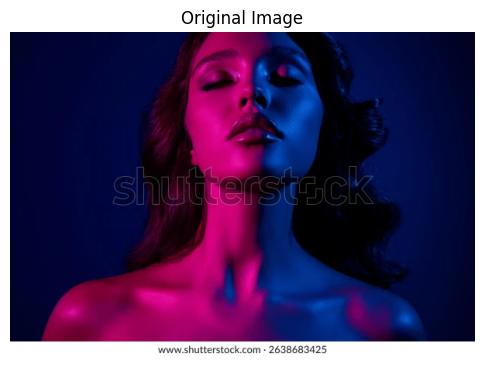

In [2]:
img = cv2.imread('woman.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

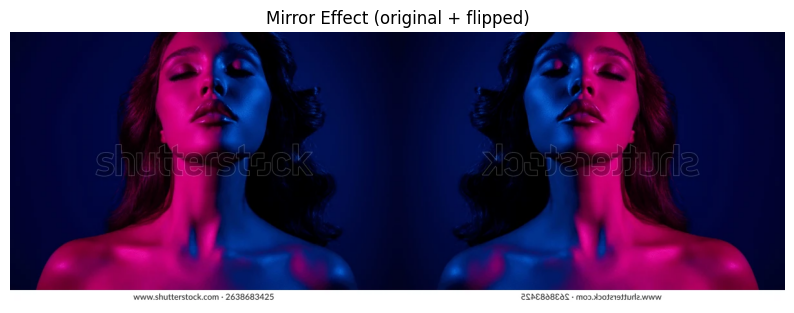

In [3]:
def mirror_effect(image):
    flipped = cv2.flip(image, 1)
    result = np.hstack((image, flipped))
    return result

mirrored = mirror_effect(img_rgb)

plt.figure(figsize=(10,6))
plt.imshow(mirrored)
plt.title("Mirror Effect (original + flipped)")
plt.axis('off')
plt.show()

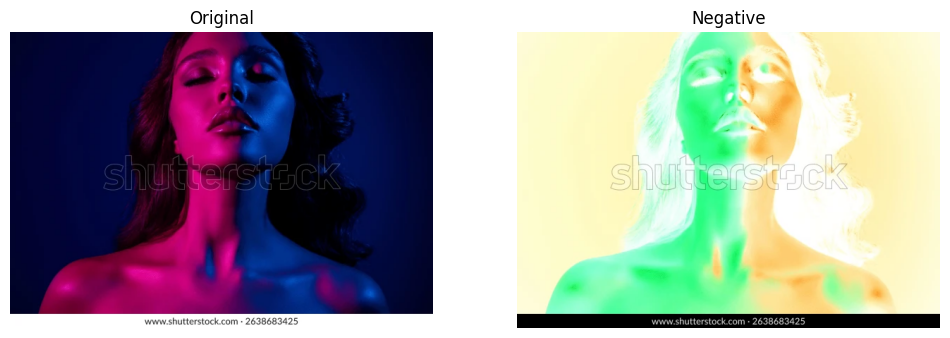

In [4]:
negative = 255 - img_rgb

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(negative)
plt.title("Negative")
plt.axis('off')

plt.show()

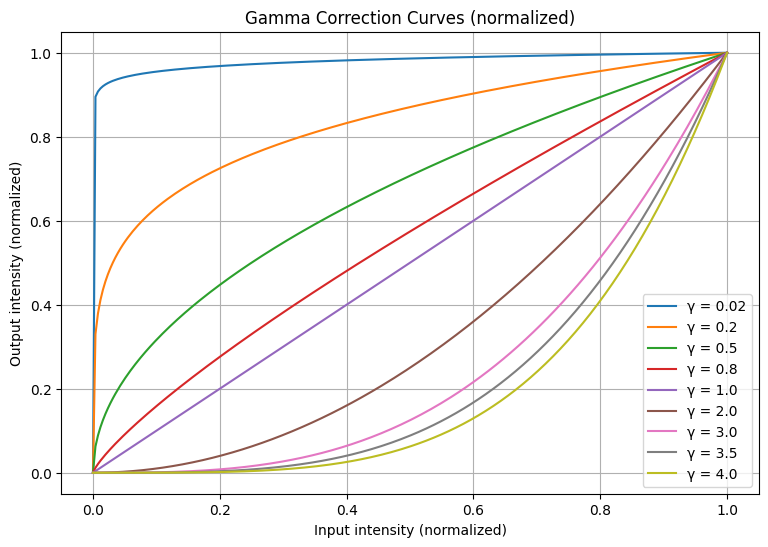

In [5]:
x = np.linspace(0, 1, 256)

gammas = [0.02, 0.2, 0.5, 0.8, 1.0, 2.0, 3.0, 3.5, 4.0]

plt.figure(figsize=(9,6))
for g in gammas:
    y = x ** g
    plt.plot(x, y, label=f'γ = {g}')

plt.title("Gamma Correction Curves (normalized)")
plt.xlabel("Input intensity (normalized)")
plt.ylabel("Output intensity (normalized)")
plt.grid(True)
plt.legend()
plt.show()

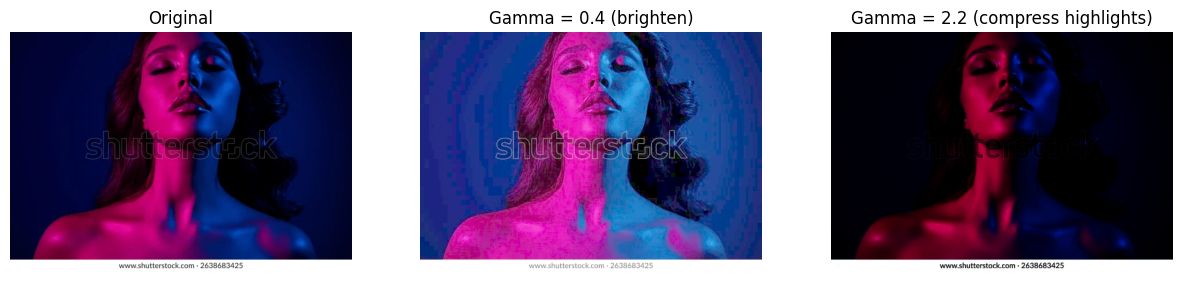

In [6]:
def gamma_correction(image, gamma=1.0):
    img_norm = image.astype(np.float32) / 255.0
    corrected = np.power(img_norm, gamma)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)
    return corrected

gamma_enhanced = gamma_correction(img_rgb, gamma=0.4)
gamma_compressed = gamma_correction(img_rgb, gamma=2.2)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gamma_enhanced)
plt.title("Gamma = 0.4 (brighten)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gamma_compressed)
plt.title("Gamma = 2.2 (compress highlights)")
plt.axis('off')

plt.show()

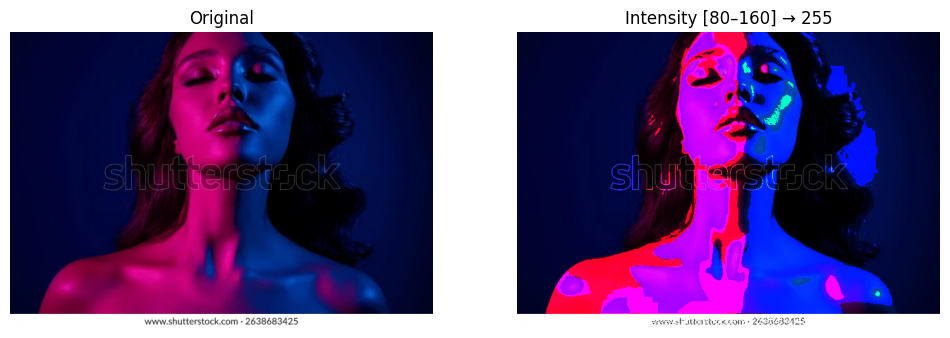

In [7]:
def intensity_window(image, A, B):
    result = image.copy()
    mask = (image >= A) & (image <= B)
    result[mask] = 255
    return result

windowed_rgb = np.zeros_like(img_rgb)
for i in range(3):
    windowed_rgb[:,:,i] = intensity_window(img_rgb[:,:,i], 80, 160)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(windowed_rgb)
plt.title("Intensity [80–160] → 255")
plt.axis('off')
plt.show()

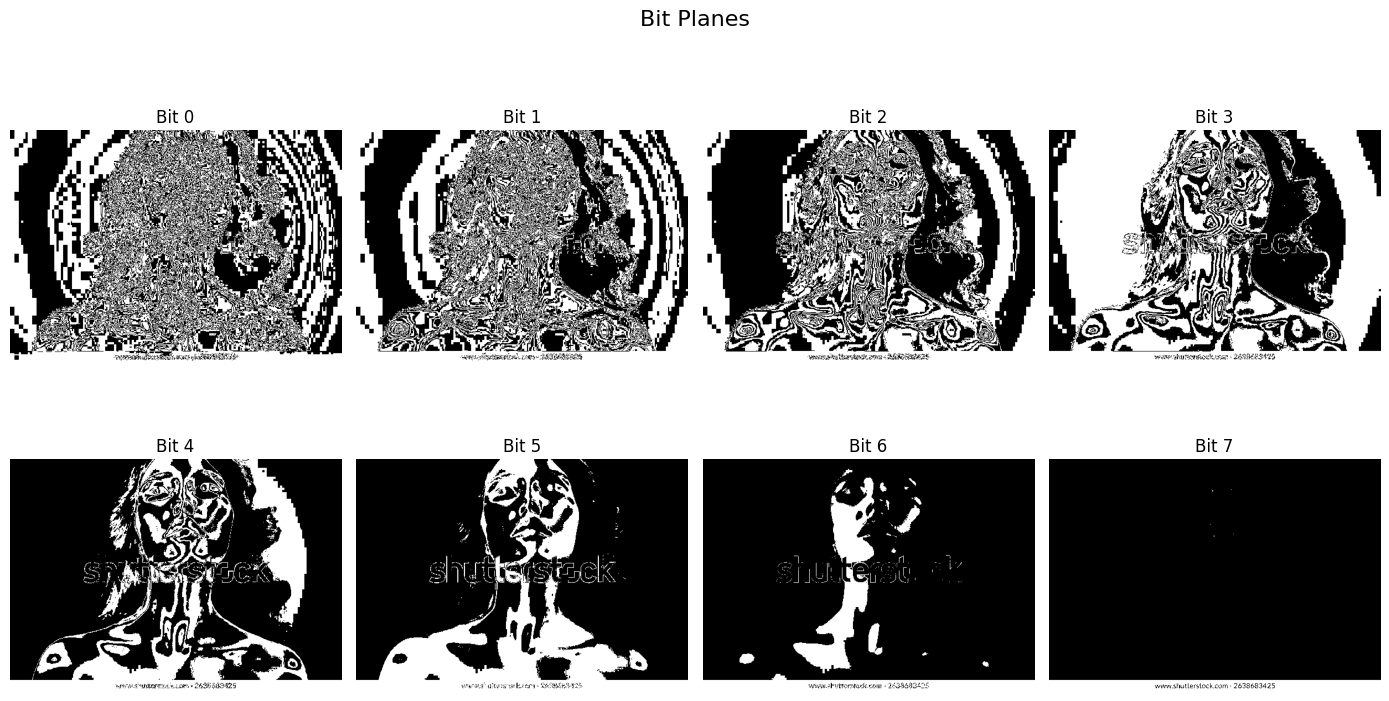

In [ ]:
def show_bit_planes(gray_img):
    plt.figure(figsize=(14, 8))
    for bit in range(8):
        plane = ((gray_img >> bit) & 1) * 255
        plt.subplot(2, 4, bit+1)
        plt.imshow(plane, cmap='gray')
        plt.title(f"Bit {bit}")
        plt.axis('off')
    plt.suptitle("Bit Planes", fontsize=16)
    plt.tight_layout()
    plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_bit_planes(gray)